In [ ]:
\newcommand{\expn}[2]{{#1}\mathrm{e}{#2}}

# Report by Ashwin Vishnu Mohanan (avmo@kth.se), KTH

> Question: Use the appended atmospheric energy spectrum (figure 12.9 in the book) to estimate the predictability time scale of the atmosphere.

![](spectra.png)


## Theory

In the figure above, we observe that there are two inertial ranges: at **synoptic scale** $E(k) \sim k^{-3}$ and at **mesoscale** $E(k) \sim k^{-5/3}$ as explained by 2D and 3D turbulence theory respectively. It is not conclusive, however the generally emerging consensus today is that the Mesoscale inertial range can be explained using Kolmogorov-type forward energy cascade (see Lindborg & Mohanan 2016). At the tail end of the spectra, it steepens again due to dissipation.

As commented in section 11.4.2 in Vallis, the predictibility time scale is determined by the time taken for small perturbations or noise at small scales to grow and and contiminate the large scale. This time scale is typically of the order of the **eddy-turnover time**. Also, there are two different ways to estimate this depending on the route taken by the error growth:

### Error growth via a local cascade

The total time taken for the error to propagate from small scale $k_1$ to large scale $k_0$ scales as:

$$T_{2d} \sim \eta^{-1/3} \ln(k_1/k_0); T_{3d} \sim \epsilon^{-1/3} k_0^{-2/3}$$ 

for 2D and 3D intertial ranges. The key aspect of such as scaling is that, for 2D turbulence the predictibility time scale can be improved by resolving larger wavenumbers. Conversely, for 3D turbulence the predictibility time scale is limited by the large scale.

### Error growth via direct interaction

In this case small scales directly interacts with large scale without going through the cascade process. In this route time taken for error growth

$$T'_{2d} \sim \eta^{-1/3} \ln(k_1/k_0); T'_{3d} \sim \epsilon^{-1/3} k_0^{-2/3} \ln(k_1/k_0)$$ 

Incidently the expression for $T'_{2d}$ is identical to $T_{2d}$. For 3D turbulence, the time scale estimate is longer by this approach, so the local cascade hypothesis dominates.

## Analysis

The data was extracted from the graph using a tool known as WebPlotDigitizer.

In [1]:
import pandas as pd

# Read the data extracted from the graph using WebPlotDigitizer
df = pd.read_csv("wpd_datasets.csv", skiprows=(1,))

# Shift meridional data one decade
df.MeridionalX *= 10
df.Meridional_fitX *= 10

df.head(3)

ZonalX        ZonalY  MeridionalX   MeridionalY   Zonal_fitX  \
0  9250.929430  1.265459e+08  9915.086980  6.597433e+07  5329.765172   
1  8579.304436  1.048435e+08  7938.844195  7.808970e+07   445.228621   
2  6746.459116  9.694398e+07  6239.779403  9.347008e+07     0.975283   

     Zonal_fitY  Meridional_fitX  Meridional_fitY  
0  1.654817e+08      5105.926210     1.654817e+08  
1  1.154782e+05       451.742868     1.240938e+05  
2  5.232991e+00         0.989552     5.623413e+00

In [2]:
%matplotlib inline
from datetime import timedelta
import numpy as np
import matplotlib.pyplot as plt

def plot_data(V):
    fig, ax = plt.subplots()
    df.plot(f"{V}_fitX", f"{V}_fitY", ax=ax, color="m", linestyle="--")
    df.plot(f"{V}X", f"{V}Y", loglog=True, kind="scatter", ax=ax)
    ax.set_ylabel(f"Spectral density: {V} wind ($m^3s^{-2}$)")
    ax.set_xlabel("Wavelength (km)")
    ax.set_xlim(1, 5e4)
    ax.invert_xaxis()
    return ax

def wavenumber(wavelength_in_km):
    return 2*np.pi / (wavelength_in_km * 1e3)

def in_days(time_in_sec):
    td = timedelta(seconds=time_in_sec)
    return td.days

# Compute wavenumbers from wavelengths
df["Zonal_k"] = wavenumber(df.ZonalX)
df["Meridional_k"] = wavenumber(df.ZonalX)

## Estimates for the inertial range limits

> **AVM: I have corrected the planetary-scale and mesoscale wavelength limits below**

From the data, it seems that the limits of the inertial ranges (in terms of wavelengths) can be approximately defined as

Synoptic (quasi-2D turbulence) inertial range: $\lambda_0 = 40000 km$, $\lambda_1 = 800 km$

Mesoscale inertial range : $\lambda_0 = 200 km$, $\lambda_1 = 7 km$

In [26]:
inertial_range_limits = np.array([
    7, 200, 800, 40_000
])  # in terms of wavelength (km)
inertial_range_limits

array([    7,   200,   800, 40000])

In [27]:
inertial_range_wavenumbers = 2 * np.pi / (inertial_range_limits * 1e3)  # in terms of wavenumbers (m-1)
inertial_range_wavenumbers

array([8.97597901e-04, 3.14159265e-05, 7.85398163e-06, 1.57079633e-07])

Thus the corresponding wavenumbers $k = 2\pi / \lambda$ is given by

Synoptic quasi-2D turbulence cascade: $k_0 = \expn{0.157}{-6} m^{-1}$, $k_1 = \expn{7.854}{-6} m^{-1}$

Mesoscale 3D turbulence cascade: $k_0 = \expn{31.416}{-6} m^{-1}$, $k_1 = \expn{897.6}{-6} m^{-1}$

The wavelengths and wavenumbers identified as the limits of the spectra have been marked as vertical lines in the following plots.

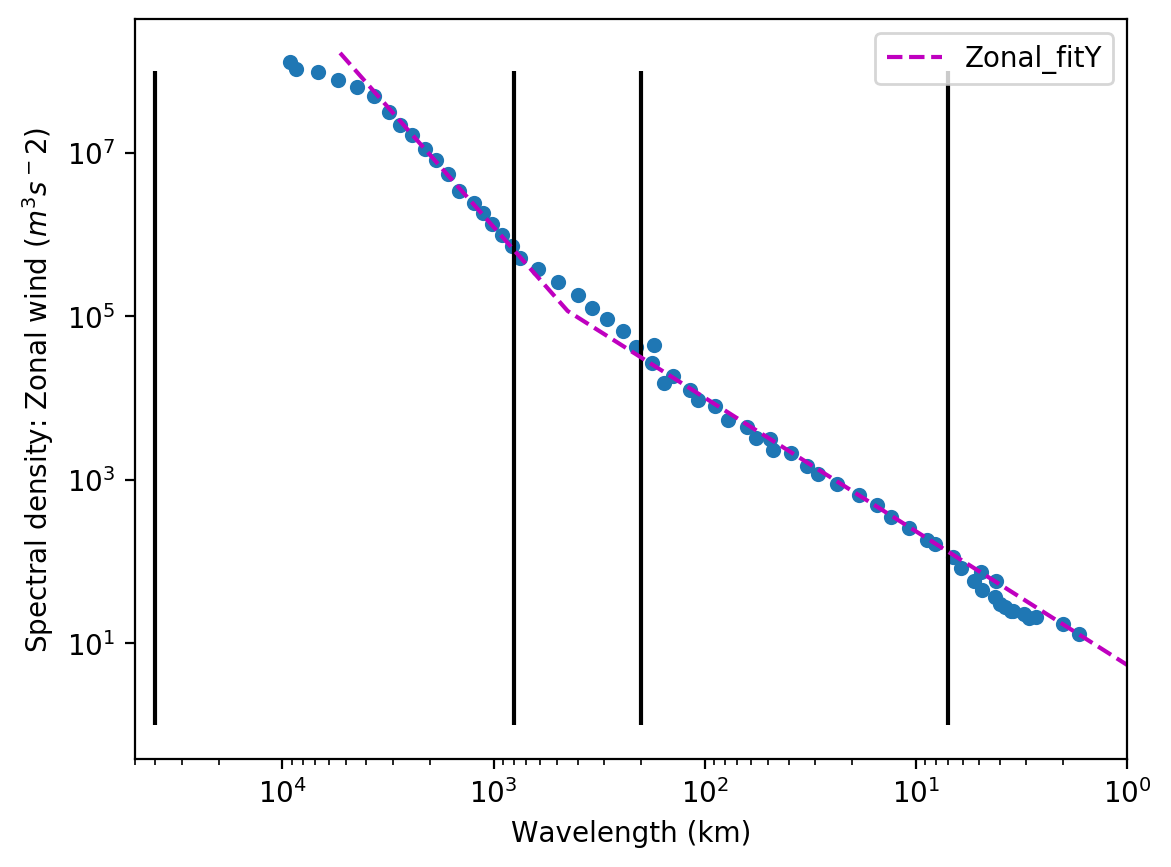

In [28]:
ax = plot_data("Zonal")
ax.vlines(inertial_range_limits, ymin=1, ymax=10e7)

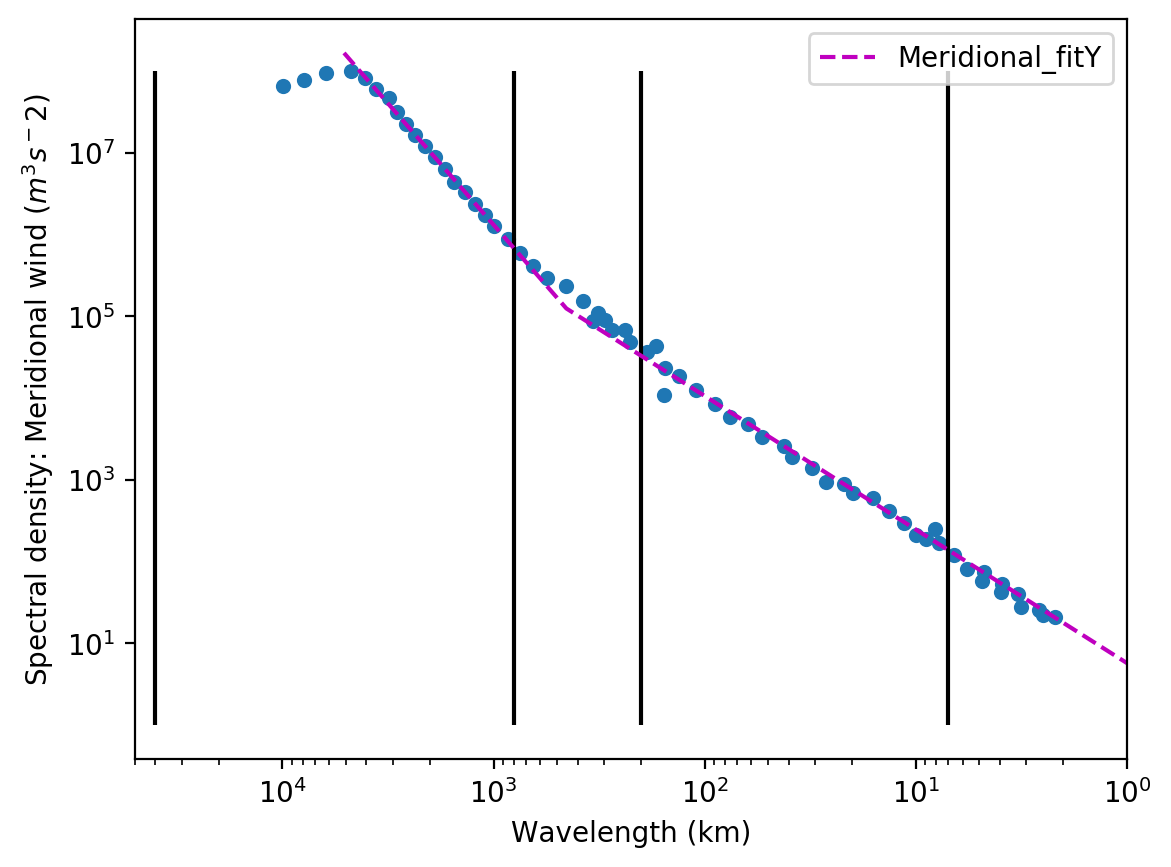

In [29]:
ax = plot_data("Meridional")
ax.vlines(inertial_range_limits, ymin=1, ymax=10e7)

## Estimates for enstrophy and energy fluxes

### From dissipation

\sout{In principle the energy dissipation rate $\epsilon$ may be extracted by integrating the dissipation spectra given by:}

$D(k) \sim 2 \nu k^2 E(k)$

This approach is not feasible as we only have 1-D spectra.

### Ad-hoc estimate from typical values

We can do some ad-hoc assumptions for the atmospheric boundary layer given in section 11.2.2 in Vallis. Dissipation scales as $\epsilon \sim U^3/L$, and for typical length scales of the order of a $100 m$ in the atmospheric boundary layer (which can be categorized as mesoscale), we can have fluctuations like $U \sim 0.01 m/s$. Putting these together we obtain:

$$\epsilon \sim 0.01^3 / 100 = 10^{-8} m^2 s^{-3}$$

### Alternate approach: fitting scaling laws for energy cascade

2D turbulence theory predicts an energy spectrum with *constant forward enstrophy flux* to scale as:

$$E(k) = K'_\eta \eta^{2/3} k^{-3}$$

3D turbulence theory predicts an energy spectrum with *constant forward energy flux* to scale as:
$$E(k) = K' \epsilon^{2/3} k^{-5/3}$$

where $K',K'_\eta$ are dimensionless constants of order unity, ~~say 5.~~

> **EK: Why choose 5? The standard value for the Kolmogorov constant is 1.4.**
>
> **AVM: You are right, I did a little more reading and corrected the text as follows.**

$K'$ was reported to vary between 1.4 and 1.6 (Frisch 1995) and $K'_\eta$ was found to vary between  0.78 and 1.39 (Lindborg & Alvelius 2000, Vallgren & Lindborg 2011)

However the one-dimensional power spectrum of a velocity component would be given by (Monin et al., 1975):

$$\frac{1}{2} u_ju_j^*(k) =  \frac{18}{55}K' \epsilon^{2/3} k^{-5/3} =  K \epsilon^{2/3} k^{-5/3}$$

This one-dimensional Kolmogorov constant was found to be approximately (Sreenivasan 1995 and Lindborg 2006):

$$K \approx 0.51$$

Similarly can estimate the one-dimensional "Kraichnan constant":

$$K_\eta = \frac{18}{55} K'\eta \approx \frac{18}{55} \times 1.3 \approx  0.43$$

> **EK: Units?**
>
> **AVM: Units are $\eta:  s^{-3}$ and $\epsilon: m^2/s^{-3}$. Is is also mentioned in the figure below**

(1e-07, 0.01)

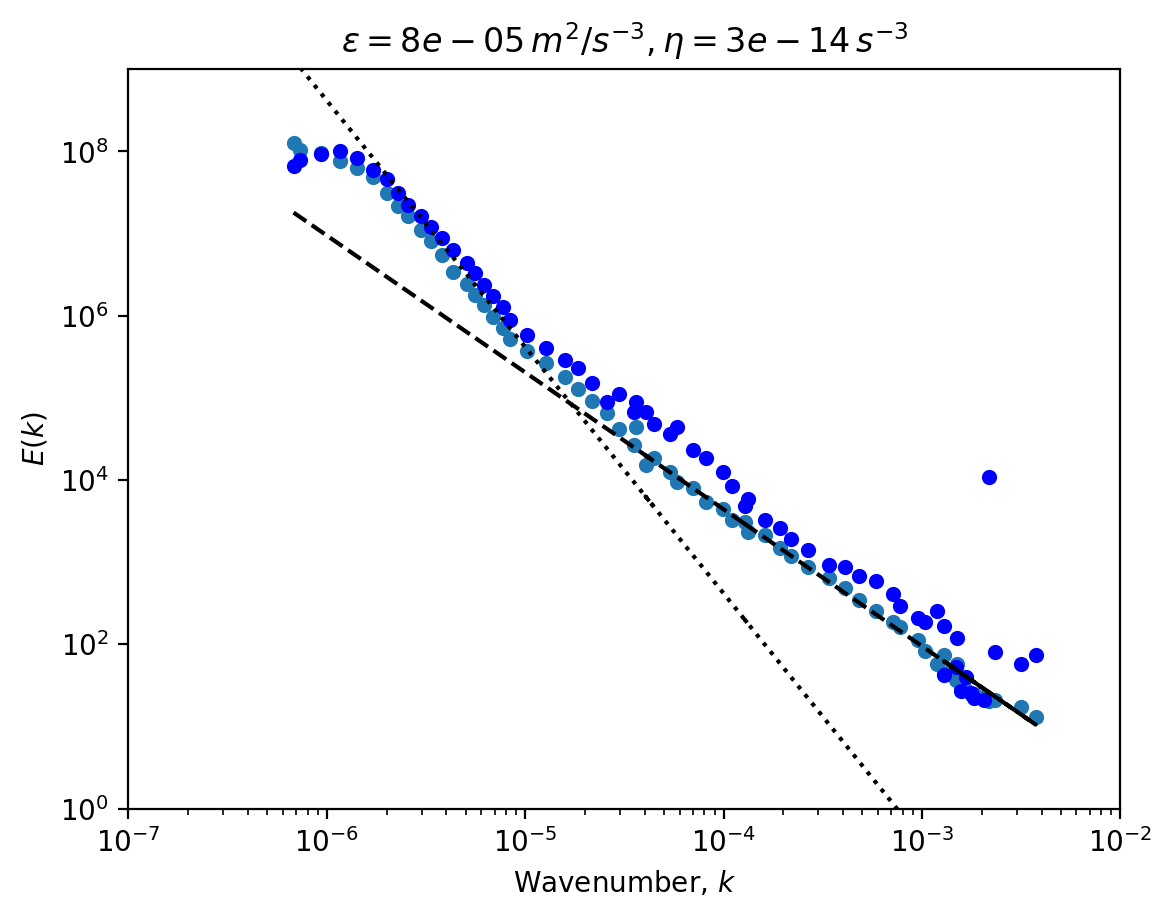

In [30]:
fig, ax = plt.subplots()
df.plot("Zonal_k", "ZonalY", loglog=True, kind="scatter", ax=ax)
df.plot("Meridional_k", "MeridionalY", loglog=True, kind="scatter", ax=ax, color="b")

K_eta = 0.43
eta = 3e-14

K = 0.51
epsilon = 8e-5

plt.plot(df.Zonal_k, K_eta*eta**(2/3) * df.Zonal_k**(-3), "k:")
plt.plot(df.Zonal_k, K*epsilon**(2/3) * df.Zonal_k**(-5./3), "k--")

plt.ylabel(r"$E(k)$")
plt.xlabel(r"Wavenumber, $k$")
plt.title(r"$\epsilon = {}\, m^2 /s^{{-3}}, \eta =  {}\, s^{{-3}}$".format(epsilon, eta))

plt.ylim(1, 1e9)
plt.xlim(1e-7, 1e-2)

Linborg (2006) also estimates a value of $\epsilon$ close to this.

We now use the expression for local cascade given earlier

## Estimates for predictibility time scale

$$T_{2d} \sim \eta^{-1/3} \ln(k_1/k_0); T_{3d} \sim \epsilon^{-1/3} k_0^{-2/3}$$ 

In [31]:
def T3d(epsilon, k0):
    t = epsilon**(-1/3) * k_0**(-2/3)
    print(t, "seconds")
    print(in_days(t), "days")

def T2d(eta, k1, k0):
    assert k1 > k0
    t = eta**(-1/3) * np.log(k_1/k_0)
    print(t, "seconds")
    print(in_days(t), "days")


### Time taken for the error to grow across the mesoscale inertial range $T_{3d}$

In [32]:
epsilon

8e-05

In [33]:
inertial_range_limits[1]

200

In [34]:
k_0 = inertial_range_wavenumbers[1]
k_0

3.141592653589793e-05

In [35]:
T3d(epsilon, k_0)

23309.70385177057 seconds
0 days


Instead if we use the ad-hoc assumptions of $\epsilon = 10^{-8} m^2s^{-1}$ we get

In [36]:
T3d(1e-8, k_0)

466194.0770354113 seconds
5 days


> **EK: Where does this value come from? It results in a very long predictability time scale, much longer than expected from experience. The `2 days` you derived above is more reasonable.**
>
> **AVM: The `2 days` estimate is now `0 days` because of updated value of $\epsilon$. I agree that the `13 days` value seems wrong. With a different assumption, that the largest mesoscale is 200 km, it now looks more plausible with `5 days`. The value is derived from the estimate for dissipation mentioned in section 1.4.2 (Ad-hoc estimate from typical values) in this report. A screenshot of the paragraph from Vallis (page:422) is also included below:**

![](adhoc.png)

### Time taken for the error to grow across the synoptic inertial range $T_{2d}$

In [41]:
eta

3e-14

Using the wavelength limits assumptions (in kilometers):

In [38]:
inertial_range_limits[-2:]

array([  800, 40000])

we have the wavenumber limits (in $rad/m$):

In [39]:
k_1, k_0 = inertial_range_wavenumbers[-2:]
k_1, k_0

(7.853981633974482e-06, 1.5707963267948966e-07)

In [40]:
T2d(eta, k_1, k_0)

125900.55613579616 seconds
1 days


Thus for a 3D mesoscale spectra an error would propagate to intermediate scale in about **0-5 days**, and for the synoptic scale spectra the error can propagate from intermediate to large-scale motions in **1 day**. As pointed out in Vallis there maybe a factor of 2 uncertainity in such a calculation.

> **EK: There is a large uncertainty but you have not included the planetary wave part of the spectrum.** **The largest scales are with a wave length of 4x10E7 meters, what is a reasonable assumption for this part of the spectrum? How much does it contribute to the total time it takes for small scale disturbances to affect the largest scales**
>
> **AVM: As clarified above, I now assume the planetary length scales to be between [800, 40000] kilometers. Thus I obtain the result that this part (excluding the mesoscale range) contributes 1 day to the total time for disturbance to propagate.**

Overall disturbance propagation time: **1-6** days. Our ability to reliably predict weather is limited by the energy and enstrophy fluxes, along with resolution in the mesoscale.

# References

1. Frisch, U. 1995 Turbulence : the legacy of A.N. Kolmogorov,.

1. Lindborg, E. . 2006 The energy cascade in a strongly stratified fluid J Fluid Mech, 550, 207–242.

1. Lindborg, E., and Alvelius, K. 2000 The kinetic energy spectrum of the two-dimensional enstrophy    
    turbulence cascade Physics of Fluids, 12, 945–947. doi:10.1063/1.870379

1. Magnusson, L., and Källén, E. 2013 Factors Influencing Skill Improvements in the ECMWF Forecasting      System Mon. Weather Rev., 141, 3142–3153. doi:10.1175/MWR-D-12-00318.1

1. Monin, A. S., Yaglom, A. M., and Lumley, J. L. (Eds.) 1975 Statistical Fluid Mechanics: Mechanics of    Turbulence, Vol. 2, The MIT Press, Cambridge, First English Ed. edition., 886 pages.

1. Sreenivasan, K. R. 1995 On the universality of the Kolmogorov constant Physics of Fluids, 7,        
    2778–2784. doi:10.1063/1.868656

1. Vallgren, A., and Lindborg, E. 2011 The enstrophy cascade in forced two-dimensional turbulence J. Fluid Mech., 671, 168–183. doi:10.1017/S0022112010005562

1. Vallis, G. K. 2017 Atmospheric and Oceanic Fluid Dynamics: Fundamentals and Large-Scale Circulation, 
   Cambridge University Press, Cambridge, 2nd ed. doi:10.1017/9781107588417
